..\data\101_ObjectCategories
['..\\data\\101_ObjectCategories\\barrel\\image_0009.jpg', '..\\data\\101_ObjectCategories\\revolver\\image_0053.jpg', '..\\data\\101_ObjectCategories\\Motorbikes\\image_0291.jpg', '..\\data\\101_ObjectCategories\\cougar_face\\image_0010.jpg', '..\\data\\101_ObjectCategories\\crab\\image_0049.jpg', '..\\data\\101_ObjectCategories\\BACKGROUND_Google\\image_0288.jpg', '..\\data\\101_ObjectCategories\\metronome\\image_0002.jpg', '..\\data\\101_ObjectCategories\\airplanes\\image_0125.jpg', '..\\data\\101_ObjectCategories\\airplanes\\image_0444.jpg', '..\\data\\101_ObjectCategories\\Motorbikes\\image_0653.jpg']


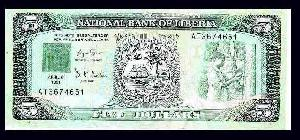

None


In [1]:
import pathlib
import os
import matplotlib.pyplot as plt
import numpy as np
data_root = pathlib.Path(os.path.join('../', 'data', '101_ObjectCategories'))
print(data_root)
import random
all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]
random.shuffle(all_image_paths)
image_count = len(all_image_paths)
print(all_image_paths[:10])
import IPython.display as display
image_path = random.choice(all_image_paths)
print(display.display(display.Image(image_path)))

In [2]:
label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
label_to_index = dict((name, index) for index, name in enumerate(label_names))
label_to_index

{'BACKGROUND_Google': 0,
 'Faces': 1,
 'Faces_easy': 2,
 'Leopards': 3,
 'Motorbikes': 4,
 'accordion': 5,
 'airplanes': 6,
 'anchor': 7,
 'ant': 8,
 'barrel': 9,
 'bass': 10,
 'beaver': 11,
 'binocular': 12,
 'bonsai': 13,
 'brain': 14,
 'brontosaurus': 15,
 'buddha': 16,
 'butterfly': 17,
 'camera': 18,
 'cannon': 19,
 'car_side': 20,
 'ceiling_fan': 21,
 'cellphone': 22,
 'chair': 23,
 'chandelier': 24,
 'cougar_body': 25,
 'cougar_face': 26,
 'crab': 27,
 'crayfish': 28,
 'crocodile': 29,
 'crocodile_head': 30,
 'cup': 31,
 'dalmatian': 32,
 'dollar_bill': 33,
 'dolphin': 34,
 'dragonfly': 35,
 'electric_guitar': 36,
 'elephant': 37,
 'emu': 38,
 'euphonium': 39,
 'ewer': 40,
 'ferry': 41,
 'flamingo': 42,
 'flamingo_head': 43,
 'garfield': 44,
 'gerenuk': 45,
 'gramophone': 46,
 'grand_piano': 47,
 'hawksbill': 48,
 'headphone': 49,
 'hedgehog': 50,
 'helicopter': 51,
 'ibis': 52,
 'inline_skate': 53,
 'joshua_tree': 54,
 'kangaroo': 55,
 'ketch': 56,
 'lamp': 57,
 'laptop': 58,
 

In [3]:
all_image_labels = [label_to_index[pathlib.Path(path).parent.name]
                    for path in all_image_paths]
print("First 10 labels indices: ", all_image_labels[:10])

First 10 labels indices:  [9, 76, 4, 26, 27, 0, 65, 6, 6, 4]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


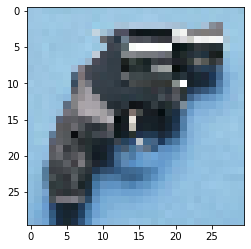

In [4]:
import tensorflow as tf
# 写成函数
img_size = (30, 30)
def read_img(img_path, img_size=(128, 128)):
    img_raw = tf.io.read_file(img_path)
    img_ = tf.image.decode_image(img_raw)
    # img_ = tf.image.convert_image_dtype(image, tf.float32)
    img_ = tf.image.resize(img_, img_size)
    if img_.shape == (*img_size , 1):
        img_ = tf.concat([img_, img_, img_], 2)
        img_ = tf.image.resize(img_, img_size)
    return  img_ / (tf.reduce_max(img_)-tf.reduce_min(img_))
# img_raw = tf.io.read_file(all_image_paths[1])
# img_ = tf.image.decode_image(img_raw)
# plt.imshow(img_)
# plt.show()
plt.imshow(read_img(all_image_paths[1], img_size))
plt.show()

In [5]:
class GetData:
    def __init__(self, image_paths, labels, img_size):
        self.img_size = img_size
        self.image_paths = np.array(image_paths)
        self.image_labels =  np.array(labels)
        self.current_label = 0
        self.length = len(image_paths)
        self.shuffle_data()
    def shuffle_data(self):
        random_index = np.random.permutation(self.length)
        self.image_paths = self.image_paths[random_index]
        self.image_labels  = self.image_labels[random_index]
    def get_data(self, capacity=30):
        start = self.current_label
        end = start + capacity
        if end > self.length:
            shuffle_data()
            self.current_label = 0
            start = self.current_label
            end = start + capacity
        empty_array = np.stack([read_img(self.image_paths[i], self.img_size) for i in range(start, end)], 0)
        return empty_array, self.image_labels[start:end]
    def real_test(self, test_split=0.01):
        split = self.length - int(self.length*test_split)
        self.length = split
        self.image_paths, self.image_labels,test_x, test_y  =\
        self.image_paths[:split], self.image_labels[:split],self.image_paths[split:], self.image_labels[split:]
        return np.stack([read_img(i, self.img_size) for i in test_x], 0), test_y
gd = GetData(all_image_paths, all_image_labels, img_size)

In [10]:
from tensorflow.keras import datasets, layers, models
model = models.Sequential()
model.add(layers.Conv2D(50, (3, 3), activation='relu', input_shape=(*img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(len(label_to_index)))

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
text_x, text_y = gd.real_test()
for i in range(200000):
    train_x, train_y = gd.get_data(capacity=9000)
    model.fit(train_x, train_y, epochs=10, verbose=1, validation_data=(text_x, text_y))

Train on 9000 samples, validate on 91 samples
Epoch 1/10
9000/9000 [==============================] - 164s 18ms/sample - loss: 3.3953 - accuracy: 0.2893 - val_loss: 2.5784 - val_accuracy: 0.4835
Epoch 2/10
9000/9000 [==============================] - 160s 18ms/sample - loss: 2.4638 - accuracy: 0.4387 - val_loss: 2.0410 - val_accuracy: 0.4945
Epoch 3/10
9000/9000 [==============================] - 163s 18ms/sample - loss: 1.8606 - accuracy: 0.5519 - val_loss: 1.8504 - val_accuracy: 0.5275
Epoch 4/10
4896/9000 [===============>..............] - ETA: 1:04 - loss: 1.4374 - accuracy: 0.6421

KeyboardInterrupt: 